In [1]:
# --- 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 데이터 불러오기
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (30858, 10)
Test shape: (13225, 9)


,ID,age,gender,tenure,frequent,payment_interval,subscription_type,contract_length,after_interaction,support_needs
0,TRAIN_00000,54.0,F,47.0,22.0,8.0,member,90,25.0,0
1,TRAIN_00001,30.0,M,16.0,15.0,5.0,vip,360,23.0,0
2,TRAIN_00002,29.0,M,8.0,30.0,21.0,plus,30,21.0,0
3,TRAIN_00003,38.0,F,38.0,23.0,10.0,vip,90,6.0,0
4,TRAIN_00004,25.0,F,52.0,3.0,17.0,member,30,1.0,2


In [2]:
# 결측치 확인

if train.isnull().sum().sum() == 0:
    print("결측치 없음")
else:
    print("결측치 존재")

missing = train.isnull().sum() / len(train)
missing = missing[missing > 0].sort_values(ascending=False)
missing

결측치 없음


Series([], dtype: float64)

In [3]:
# 수치형/범주형 변수 분리

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

print("수치형 변수:", list(num_cols))
print("범주형 변수:", list(cat_cols))

수치형 변수: ['age', 'tenure', 'frequent', 'payment_interval', 'contract_length', 'after_interaction', 'support_needs']
범주형 변수: ['ID', 'gender', 'subscription_type']


In [4]:
print(train.columns)

Index(['ID', 'age', 'gender', 'tenure', 'frequent', 'payment_interval',
       'subscription_type', 'contract_length', 'after_interaction',
       'support_needs'],
      dtype='object')


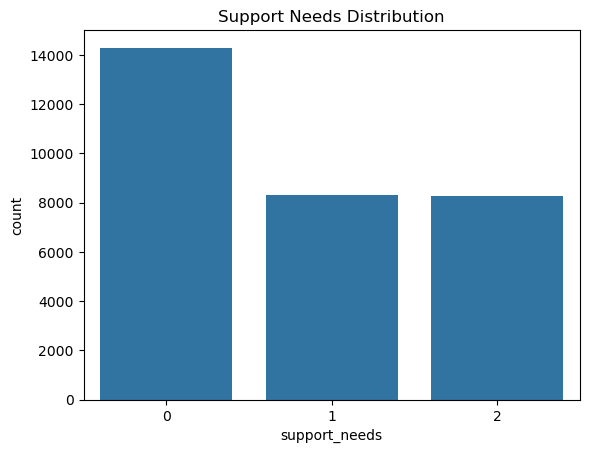

In [5]:
# 타깃 변수 분포 확인

sns.countplot(x='support_needs', data=train)
plt.title("Support Needs Distribution")
plt.show()

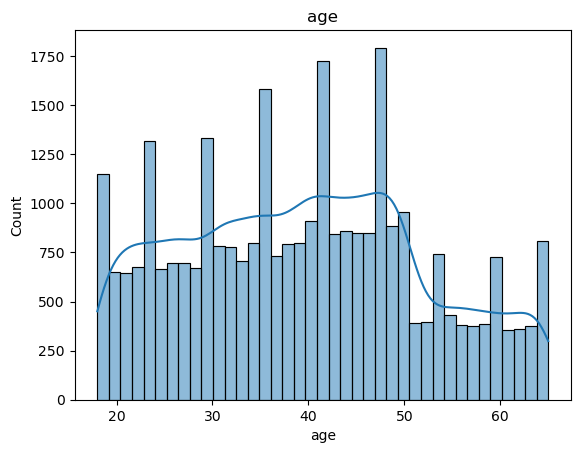

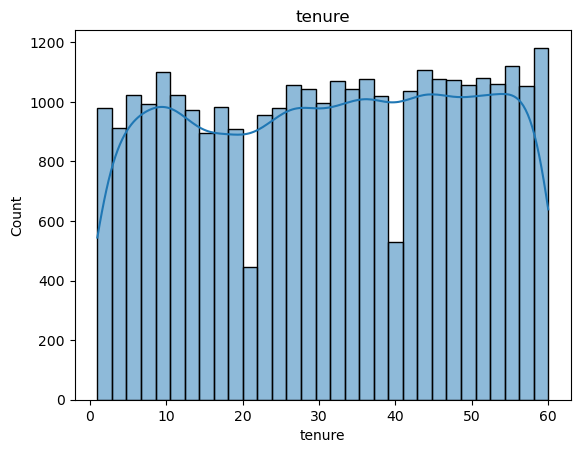

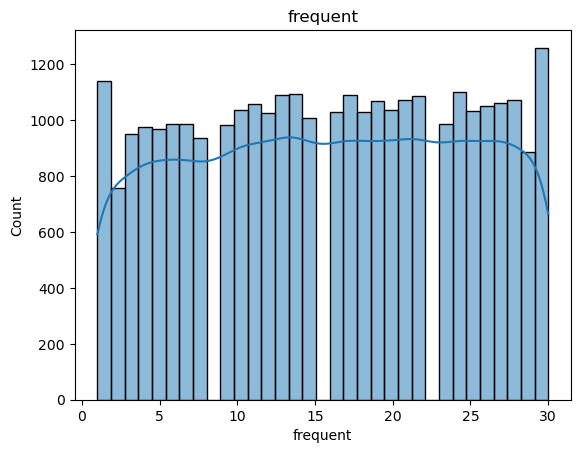

In [6]:
# 주요 변수 시각화

for col in num_cols[:3]:  # 상위 3개만 예시
    sns.histplot(train[col], kde=True)
    plt.title(col)
    plt.show()

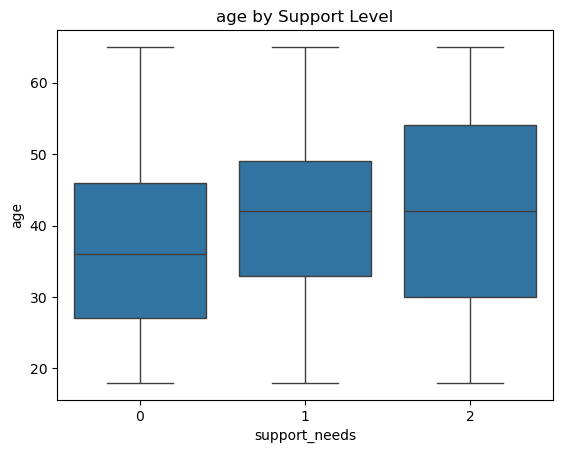

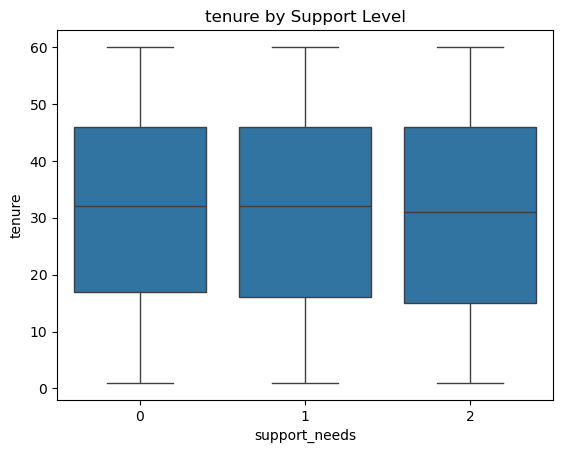

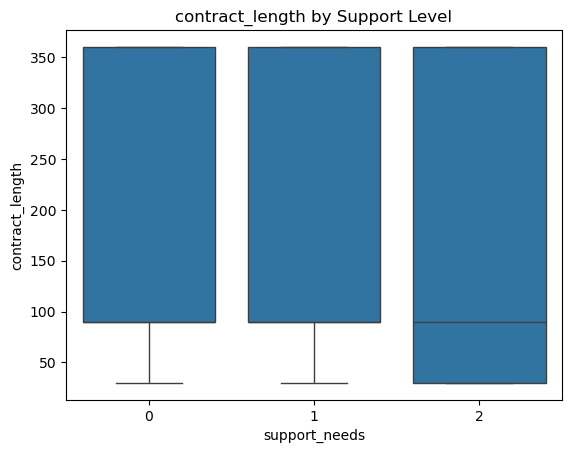

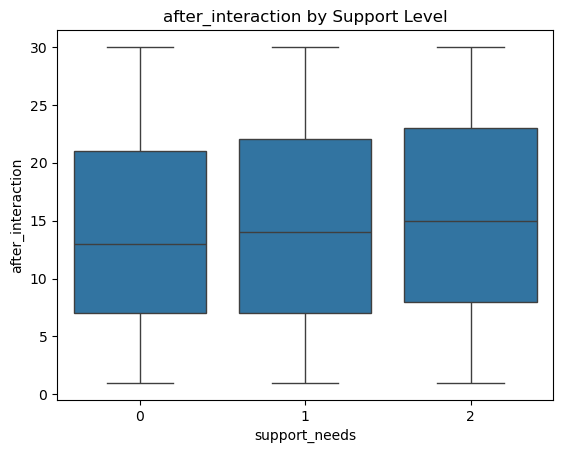

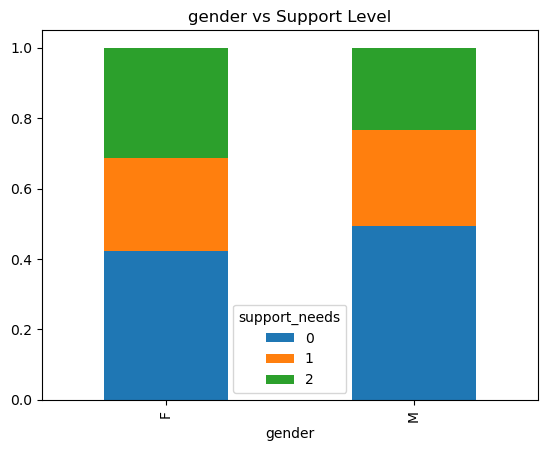

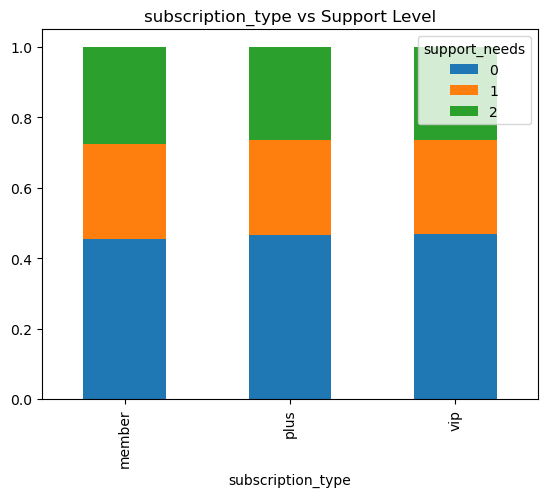

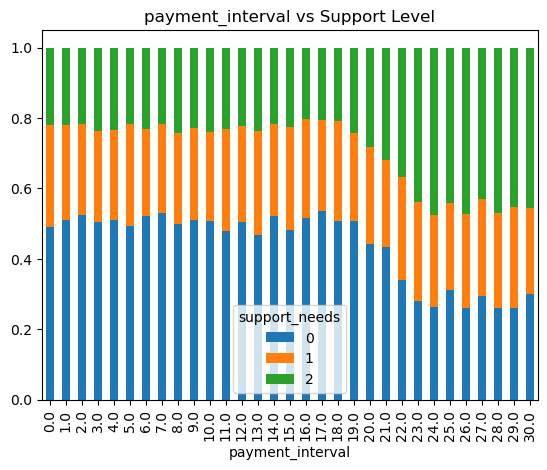

In [7]:
# 타겟별 특징 비교

# 수치형 변수별 boxplot
num_cols = ['age', 'tenure', 'contract_length', 'after_interaction']  # 예시
for col in num_cols:
    sns.boxplot(x='support_needs', y=col, data=train)
    plt.title(f'{col} by Support Level')
    plt.show()

# 범주형 변수별 비율 비교
cat_cols = ['gender', 'subscription_type', 'payment_interval']  # 예시
for col in cat_cols:
    cross_tab = pd.crosstab(train[col], train['support_needs'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Support Level')
    plt.show()

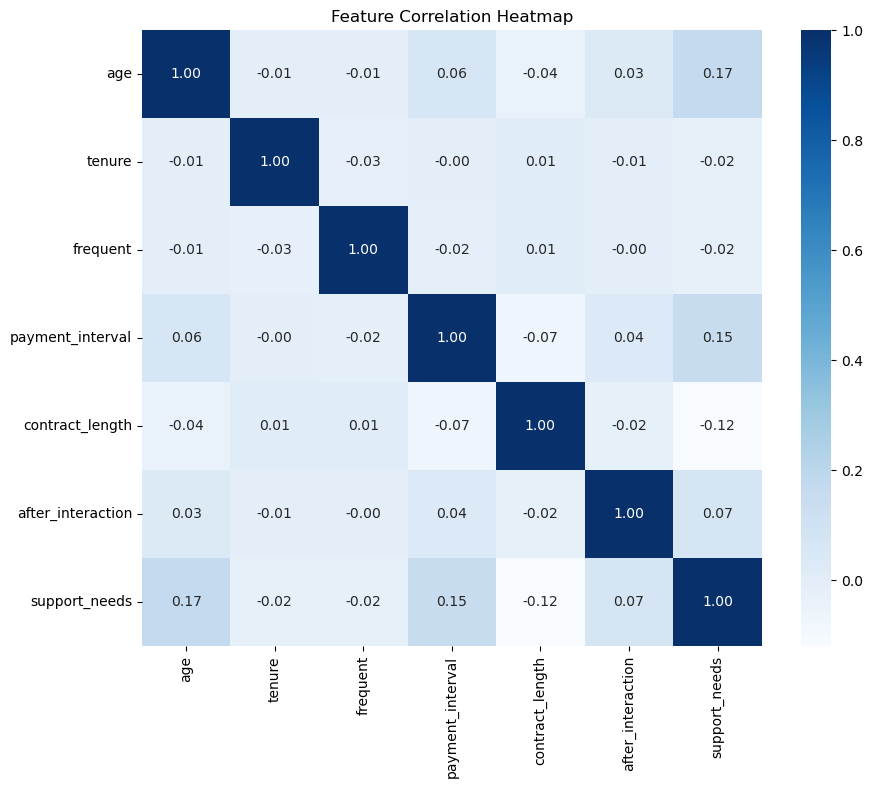

In [8]:
# 상관관계 분석

corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

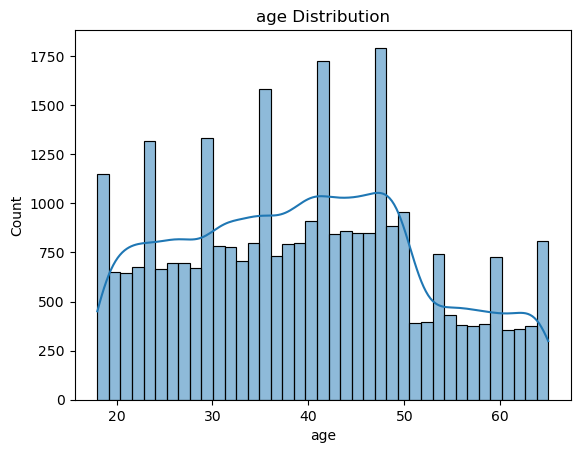

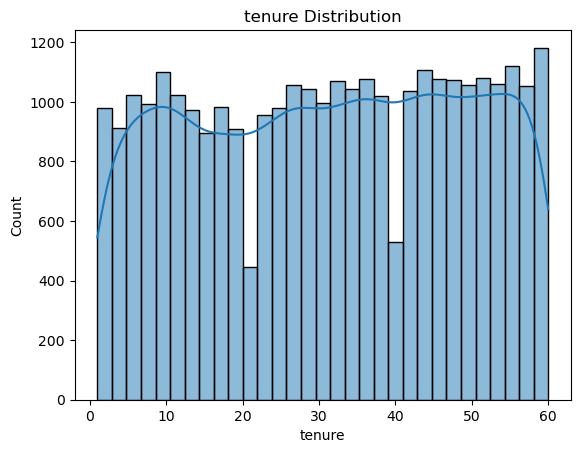

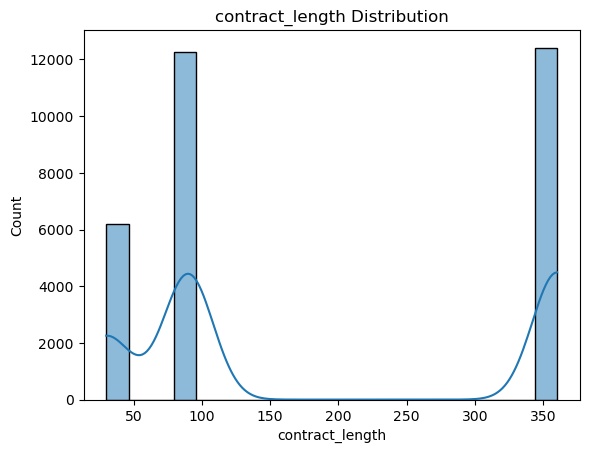

In [9]:
# Feature Distribution by Group

for col in ['age', 'tenure', 'contract_length']:
    sns.histplot(train[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

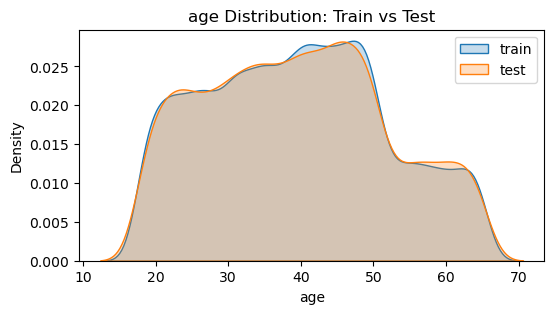

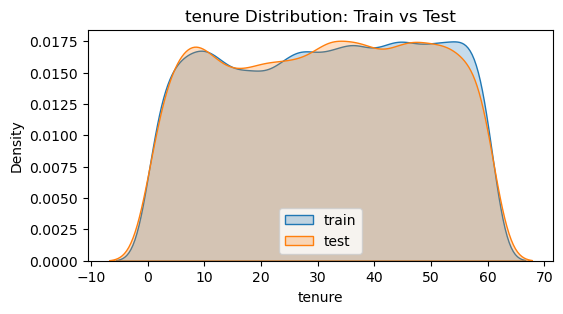

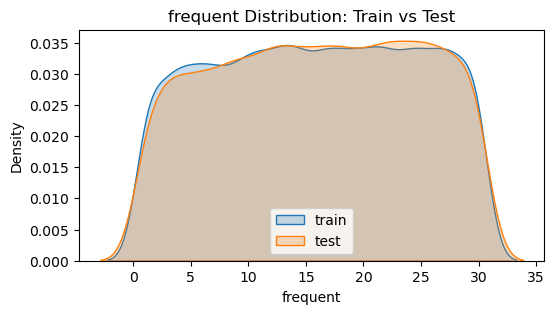

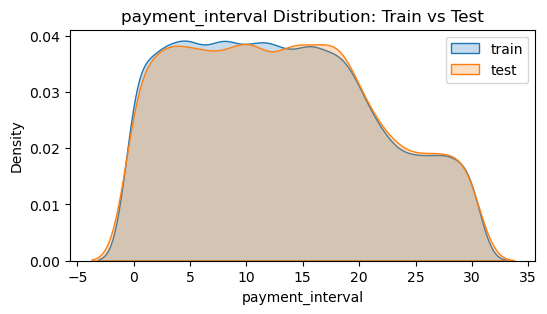

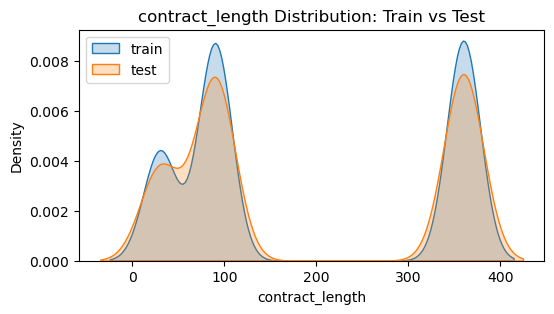

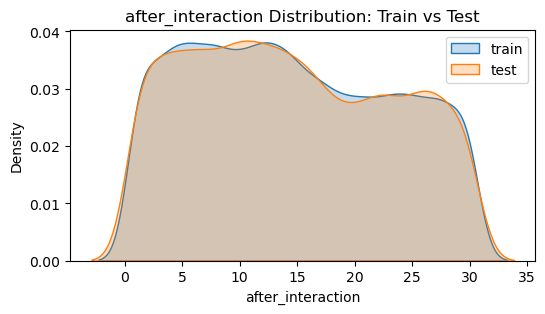

In [11]:
# Train/Test 간 데이터 분포 차이 확인

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'support_needs']  # target 제외

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(train[col], label='train', fill=True)
    sns.kdeplot(test[col], label='test', fill=True)
    plt.title(f'{col} Distribution: Train vs Test')
    plt.legend()
    plt.show()
